In [1]:
%run initialize_jupyter_handybeam.py

current_dir is "C:\Users\JerzyDziewierz\Documents\git\handybeam-project\ul-handybeam-examples\EngD-course-root"
expecting handybeam module at "C:\Users\JerzyDziewierz\Documents\git\handybeam-project\handybeam-core-code"


C:\Users\JerzyDziewierz\Documents\git\handybeam-project\handybeam-core-code\handybeam\solver.py:12: UserWarning: solver.py is obsolete - use beamformer.py instead
  warnings.warn('solver.py is obsolete - use beamformer.py instead')


# Use the Array Builder

## Set up the Array Builder with some initial parameters

In [2]:
focal_point=(0.0,5e-3,60e-3)
focal_radius=np.sqrt(focal_point[0]**2+focal_point[1]**2+focal_point[2]**2)

In [85]:
importlib.reload(strathclyde) # this makes sure that any changes to the source code are being used in this session

array_builder=strathclyde.LinearArray(
    radiation_frequency=500e3,
    sound_velocity=5600,
    sampling_density=11, # count of sampling points per wavelength
    passive_aperture=32e-3,
    element_pitch=3e-3,
    element_width=1e-3,
    element_count=16,
    focal_point=focal_point,
    amplitude_setting=1e4,
    window_coefficients=scipy.signal.windows.kaiser(16,beta=0.1))
array_builder

Basic linear probe:
> Environment:
>>   radiation frequency: 500.0kHz
>>   sound_velocity :5600.0m/s
>>   sound wave length :11.200mm
>>   medium wavenumber: 89.3[waves/meter]
>>   point sources sampling density: 11pt/lambda linear, spacing of 1.018mm
  
> Probe definition:
>>   Passive aperture: 32.0mm
>>   element width: 1.000mm
>>   element count: 16
  
> Probe calculated properties:
>>   inter-element gap: 2.0mm
>>   Active aperture: 48.0mm
>>   Active aperture near field transition/boundary: 51.4mm
>>   Passive aperture near field transition/boundary: 22.9mm
  
> Focal point calculated properties:
>>   focal distance: 40.3mm
>>   active aperture -6dB focal spot size: 9.6mm
>>   passive aperture -6dB natural focus spot size: 8.2mm

## Visualize the settings of the Array Builder

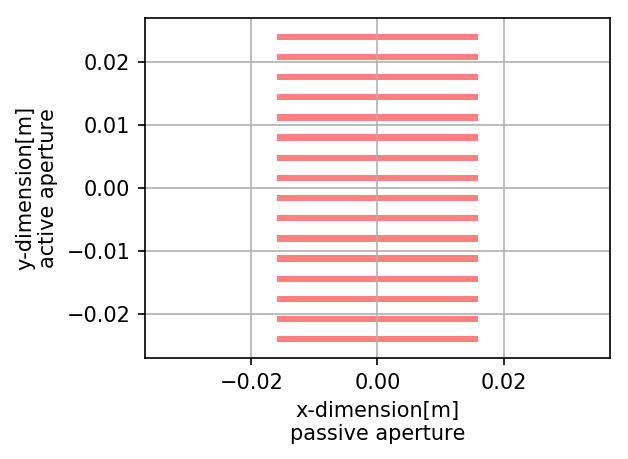

In [86]:
array_builder.visualize_array_elements() # visualize with output to screen
array_builder.visualize_array_elements(filename='example_visualize_array_elements.png') # save figure to disk

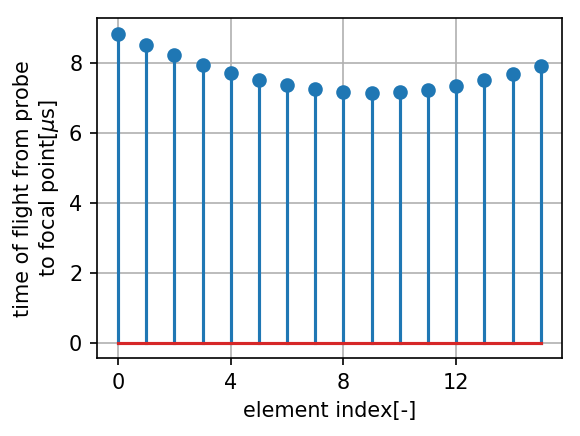

In [87]:
array_builder.visualize_time_of_flight() # visualize with output to screen
array_builder.visualize_time_of_flight(filename='example_visualize_time_of_flight.png') # save figure to disk

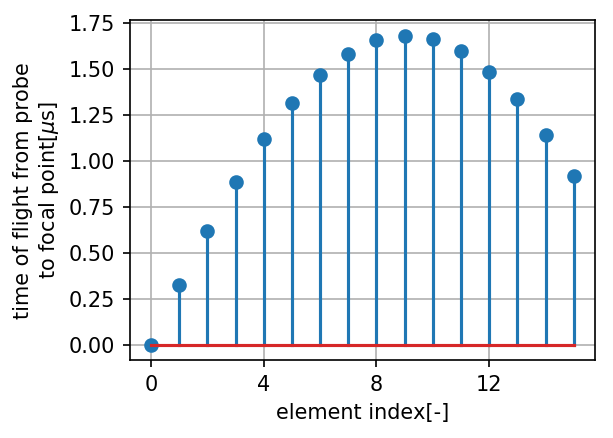

In [88]:
array_builder.visualize_focal_laws()
array_builder.visualize_focal_laws(filename='example_visualize_focal_laws.png')

In [89]:
# these are avaliable properties and methods
# dir(array_builder)

In [90]:
#??array_builder.focal_distance

### Visualizes the point cloud of points that simulate the element aperture

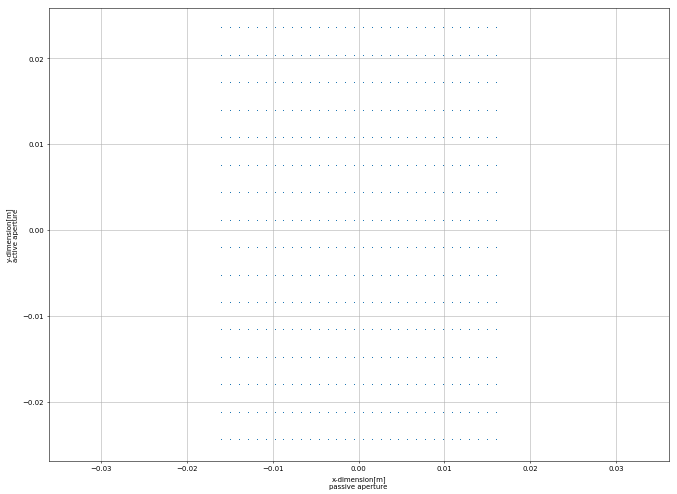

In [91]:
array_builder.visualize_point_cloud_all_elements(figsize=(16,12),dpi=50)
array_builder.visualize_point_cloud_all_elements(figsize=(16,12),dpi=50,filename='example_point_cloud_all_elements.png')

## Create the HandyBeam simulation object

In [92]:
handybeam_world = array_builder.create_handybeam_world()

In [93]:
handybeam_world

Property,Value
wave velocity,5600.0 m/s
frequency,500.0 kHz
wavelength,11.200 mm
wavenumber,89.286 waves/m


In [94]:
f'{handybeam_world}'

'world = handybeam.world.World(frequency=self.radiation_frequency, sound_velocity=self.sound_velocity)\r\nhandybeam.world.World() with sound velocity of 5600.0m/s, frequency 500.0kHz, medium_wavelength of 11.200mm, wavenumber 89.286, 0 sampler(s)\r\nTx array: Strathclyde style linear array, subsampled, 16 real elements'

In [95]:
print(handybeam_world)

world = handybeam.world.World(frequency=self.radiation_frequency, sound_velocity=self.sound_velocity)
handybeam.world.World() with sound velocity of 5600.0m/s, frequency 500.0kHz, medium_wavelength of 11.200mm, wavenumber 89.286, 0 sampler(s)
Tx array: Strathclyde style linear array, subsampled, 16 real elements


# Use the HandyBeam package

## Set up the pressure field sampling grids

In [96]:
# Set grid spacing per wavelength for rectilinear sampling grid.

grid_spacing_per_wavelength = 0.1

# Set grid extent around the origin.

grid_extent_around_origin_x = 0.3
grid_extent_around_origin_y = 0.3

# Set plane height 

sampler_grid_centre = 300e-3

# Add a rectilinear sampling grid to the world.
importlib.reload(handybeam.samplers.rectilinear_sampler)
rectilinear_sampler_xz = \
    handybeam_world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = handybeam_world,
        origin = np.array((0,0,sampler_grid_centre)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((1,0,0)),
        parallel_vector=np.array((0,-1,0)),
        align_grid_size_to_gpu = 64
        )
    )
print(rectilinear_sampler_xz)

grid_extent_around_origin_x = 0.3
grid_extent_around_origin_y = 0.3
sampler_grid_centre = 150e-3

rectilinear_sampler_xy = \
    handybeam_world.add_sampler(
    handybeam.samplers.rectilinear_sampler.RectilinearSampler(
        parent = handybeam_world,
        origin = np.array((0,0,sampler_grid_centre)),
        grid_spacing_per_wavelength = grid_spacing_per_wavelength,
        grid_extent_around_origin_x = grid_extent_around_origin_x,
        grid_extent_around_origin_y = grid_extent_around_origin_y,
        normal_vector=np.array((0,0,1)),
        parallel_vector=np.array((0,-1,0)),
        align_grid_size_to_gpu = 64
        )
    )
print(rectilinear_sampler_xy)

RectilinearSampler: 576x576 points, spacing 1.12000mm
RectilinearSampler: 576x576 points, spacing 1.12000mm


In [97]:
# get some details about the points in the tx array descriptor
print(handybeam_world.tx_array.tx_array_element_descriptor.shape)
print(handybeam_world.tx_array.tx_array_element_descriptor.dtype)
print(handybeam_world.tx_array.describe_element(0))

(512, 16)
float32
element 0: 
 >   (location) =(-16.0, -24.5, 0.0)mm
 >    (normals) =(0.0, 0.0, 1.0)
 > (dir coeffs) =(phase_c1:0.0, | amp:(9.999999974752427e-07, 0.0, 0.0))
 >  amp setting =9975.046875
 >        phase =0.0
 >       (nans) =(nan, nan, nan, nan) 



## Ask the pressure fields to be computed, or "propagated"

In [98]:
rectilinear_sampler_xz.propagate(print_performance_feedback=True)
rectilinear_sampler_xy.propagate(print_performance_feedback=True)

global_work_size: (576, 576, 1)
local_work_size:  (576, 1, 1)
profiling: info:
profiling: wall time: 0.0268[sec] == 37.3[FPS]
profiling: kernel time : 21432.3[us] == 46.7[FPS]
profiling: compute performance: 7925.8[MRays/sec]
profiling: memcopy time: 2619.5[us] == 381.8[FPS]
profiling: memcopy bandwidth: 2.4[GB/sec]
profiling: command bandwidth: 195312.5[CPS]
global_work_size: (576, 576, 1)
local_work_size:  (576, 1, 1)
profiling: info:
profiling: wall time: 0.0270[sec] == 37.0[FPS]
profiling: kernel time : 21934.1[us] == 45.6[FPS]
profiling: compute performance: 7744.5[MRays/sec]
profiling: memcopy time: 2594.4[us] == 385.5[FPS]
profiling: memcopy bandwidth: 2.4[GB/sec]
profiling: command bandwidth: 224820.1[CPS]


## Visualize the general acoustic field generated

Note that generating the 3D figure is rather slow -- it may take some seconds before you see it. Use patience.

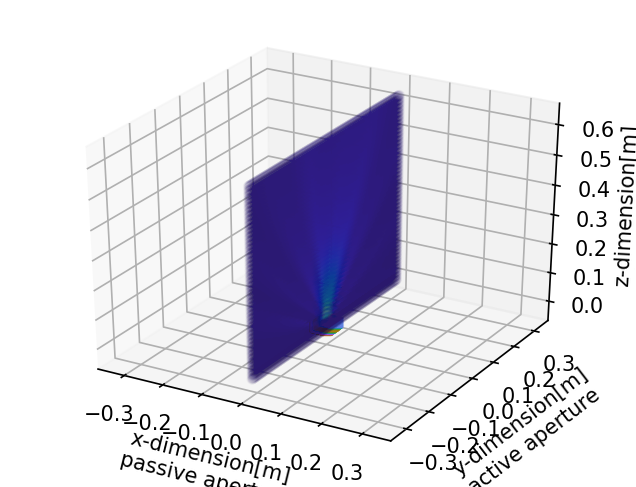

In [99]:
import handybeam.visualise
importlib.reload(handybeam.visualise)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[0]],alpha=0.02)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[0]],alpha=0.02,filename="field_xz_3D.png")

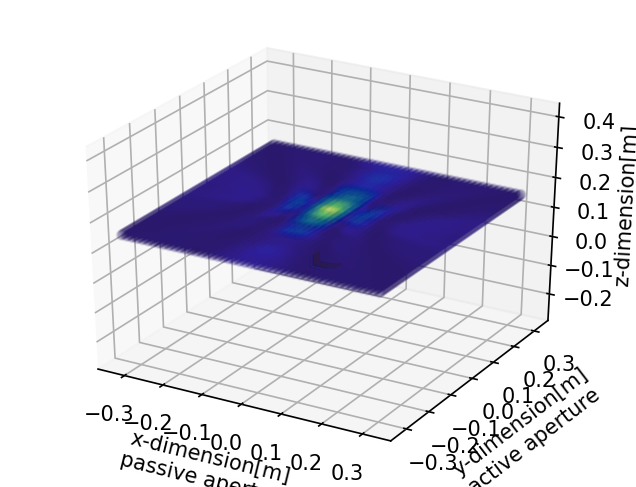

In [100]:
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[1]],alpha=0.03)
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[handybeam_world.samplers[1]],alpha=0.03,filename="field_xy_3D.png")

In [101]:
# You can get the actual pressures (complex numbers) from here:
# feel free to visualize and process these Yourself

# rectilinear_sampler_xz.pressure_field
# rectilinear_sampler_xz.coordinates
# dir(rectilinear_sampler_xz)


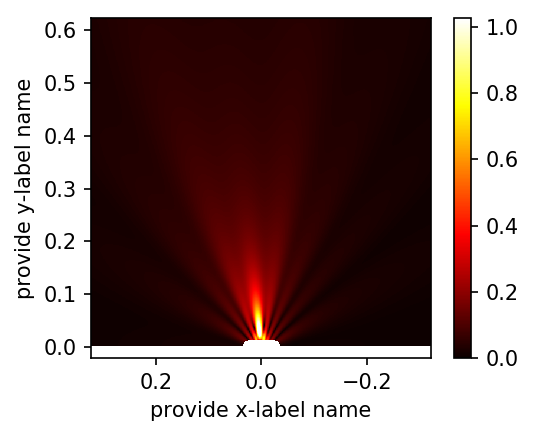

In [102]:
importlib.reload(strathclyde)
strathclyde.visualize_2d_amplitude_xz(rectilinear_sampler_xz) # the "xz" version attempts to give You real-world coordinates. Only works for well-aligned grids.

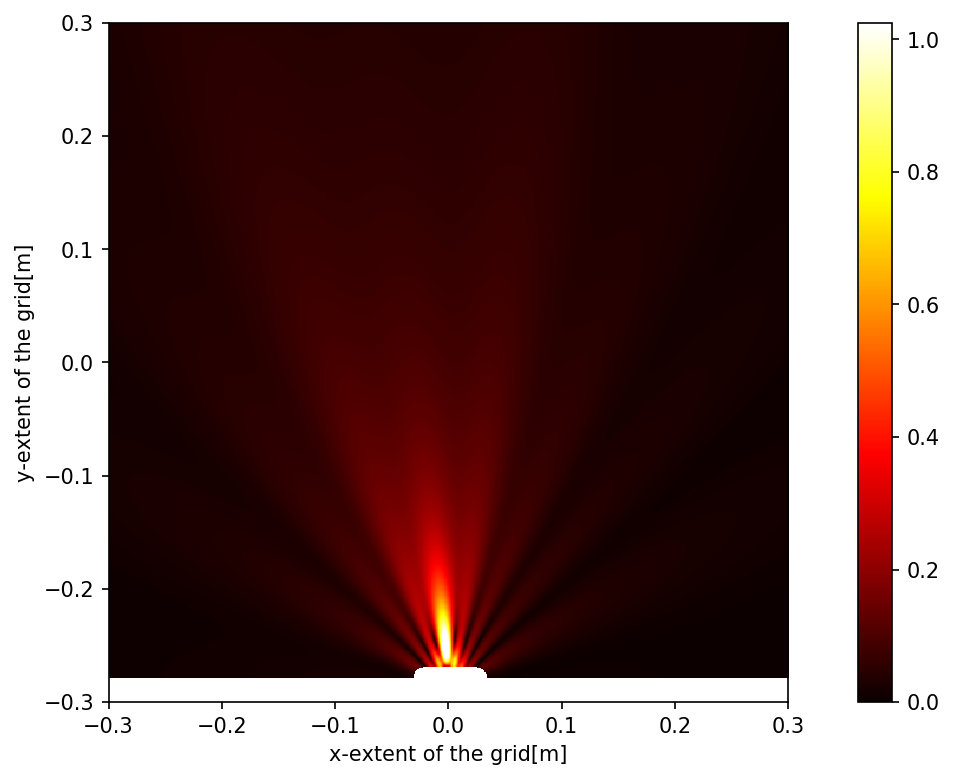

In [103]:
# side section, looking from the side of the array
strathclyde.visualize_2d_amplitude(rectilinear_sampler_xz,figsize=(12,6)) # This is a more general visualizer that uses the grid coordinates. Note, these are not world coordinates.


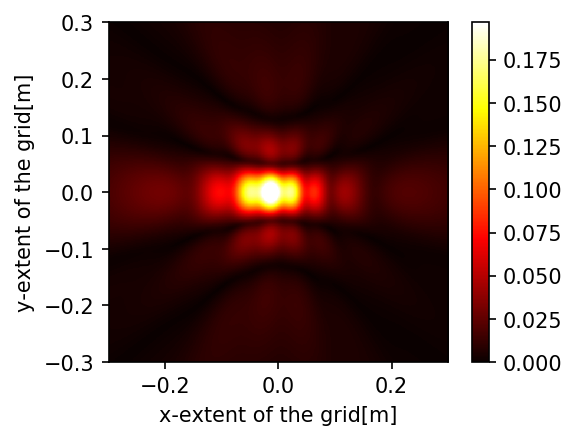

In [104]:
# top section, loking down onto the array
strathclyde.visualize_2d_amplitude(rectilinear_sampler_xy)

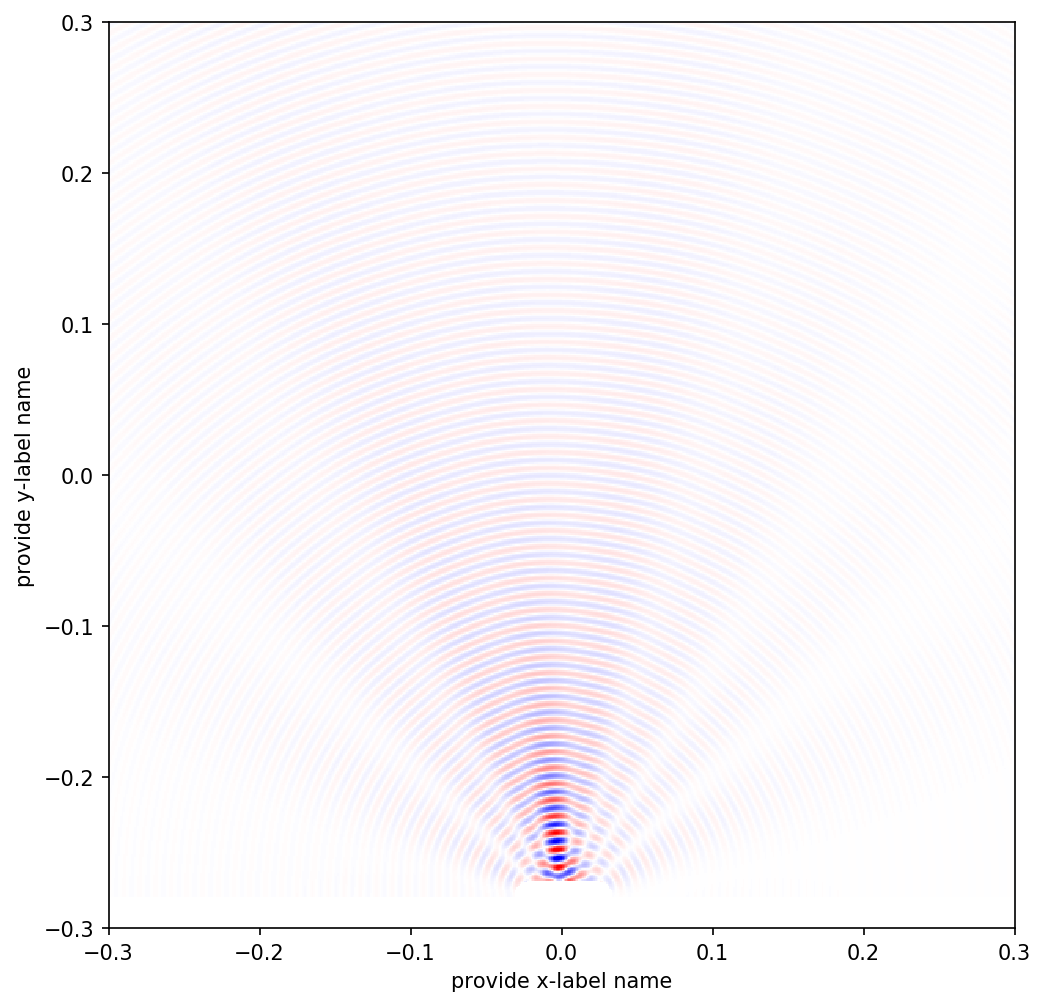

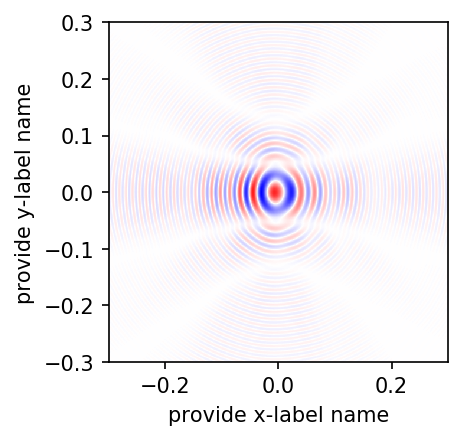

In [105]:
strathclyde.visualize_2d_real(rectilinear_sampler_xz,figsize=(12,8))
strathclyde.visualize_2d_real(rectilinear_sampler_xy)

## Calculate the pressure distribution in a semicircle around the array

### Create the sampler

In [106]:
# create a sampling line, semi-circle around the array, to sample the field there
tau=2*np.pi
sampler_radius=focal_radius
sampler_angles=np.linspace(-tau/4,tau/4,num=2048,endpoint=True)
ys=np.sin(sampler_angles)*sampler_radius
zs=np.cos(sampler_angles)*sampler_radius
xs=np.zeros(ys.shape)

In [107]:
importlib.reload(handybeam.samplers.clist_sampler)
semicircle_sampler=handybeam_world.add_sampler(handybeam.samplers.clist_sampler.ClistSampler())
semicircle_sampler.add_sampling_points(xs,ys,zs)

### Propagate and visualize

In [108]:
semicircle_sampler.propagate(print_performance_feedback=True)

sampling_point_count=2048
global_work_size_x=2048
profiling: info:
profiling: wall time: 0.0086[sec] == 116.9[FPS]
profiling: kernel time : 736.3[us] == 1358.2[FPS]
profiling: compute performance: 1424.2[MRays/sec]
profiling: memcopy time: 5.0[us] == 199044.6[FPS]
profiling: memcopy bandwidth: 3.0[GB/sec]
profiling: command bandwidth: 229779.4[CPS]


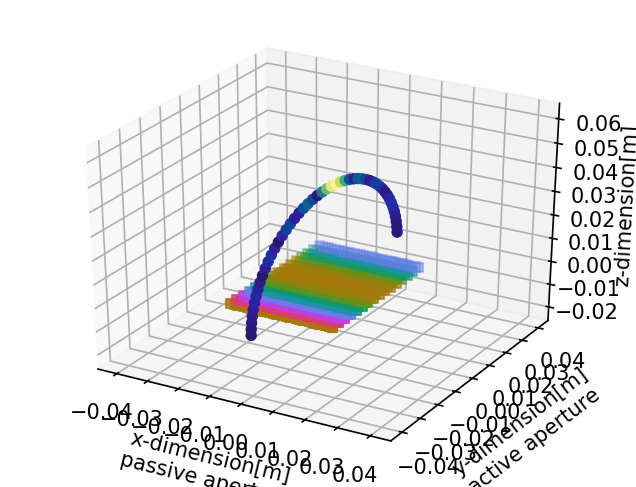

In [109]:
handybeam.visualise.visualize_3D_only(handybeam_world,samplers=[semicircle_sampler],alpha=1)

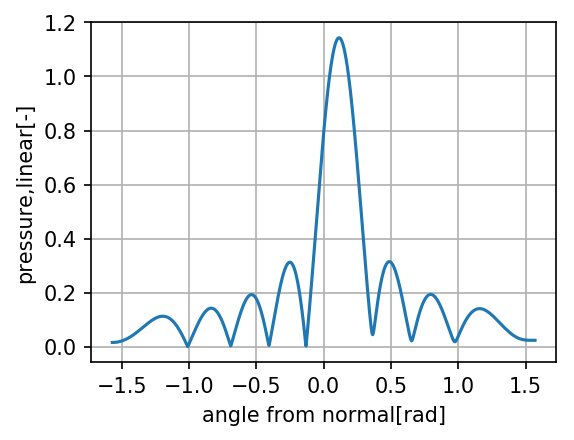

In [110]:
importlib.reload(handybeam.visualise) # this is for editing the library only, can be removed for production - reloads changes
handybeam.visualise.plot_1D_pressure_vs_angle(handybeam_world,sampler_angles,np.abs(semicircle_sampler.pressure_field))
handybeam.visualise.plot_1D_pressure_vs_angle(handybeam_world,sampler_angles,np.abs(semicircle_sampler.pressure_field),filename='pressure_linear.png')


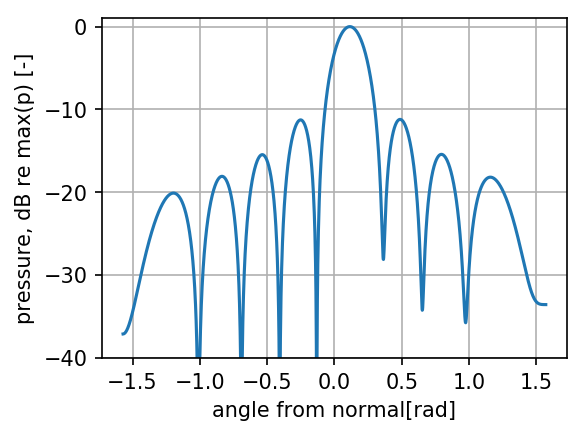

In [111]:
handybeam.visualise.plot_1D_pressure_vs_angle_db_normalized(handybeam_world,sampler_angles,np.abs(semicircle_sampler.pressure_field))

## Analyse the main lobe and side lobe data

In [112]:
importlib.reload(strathclyde)
stats=strathclyde.analyse_semicircle_sampled_data(sampler_angles,sampler_radius,semicircle_sampler.pressure_field)
stats

{'pabs': array([0.01598423, 0.01598672, 0.01599452, ..., 0.02403219, 0.02403232,
        0.02403225], dtype=float32),
 'peak_p': 1.1431311,
 'peak_location_idx': 1098,
 'peak_location_angle': 0.11433739750485583,
 'p_db': array([-37.08809 , -37.086735, -37.082497, ..., -33.546055, -33.54601 ,
        -33.546032], dtype=float32),
 'db_mask_3db': array([False, False, False, ..., False, False, False]),
 'beam_width_idx': 146,
 'first_up': 1026,
 'last_up': 1171,
 'beam_width_3db_radians': 0.22253587433830968,
 'beam_width_linear': 0.008970707885792148,
 'mask_main_lobe_right': 1317,
 'mask_main_lobe_left': 880,
 'mask_main_lobe': array([False, False, False, ..., False, False, False]),
 'power_main_lobe': 155.42671,
 'power_side_lobes': 28.598642,
 'peak_sidelobe': 0.31496072,
 'contrast_mts_ratio': 14.703603982925415}

In [113]:
strathclyde.print_analysis(stats)

Main lobe:
 >> peak amplitude value: 1.143131136894226
 >> peak location : 0.114 radians = 6.55 degrees
 >> angular width (-3dB): 0.223 radians = 12.75 degrees
 >> linear width (-3dB): 8.971mm 
integrated main lobe power: 155.4267120361328
Side lobes:
 >> peak side lobe value :0.3149607181549072
 >> integrated side lobe power: 28.598642349243164
Contrast metric:
 >> integrated main lobe to side lobe ratio: 14.70 dB


## Visualize the main lobe and side lobe mask location

Text(0.5,0,'sampler_angles[rad]')

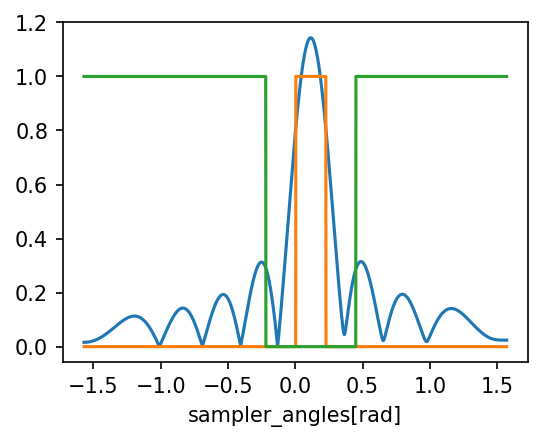

In [114]:
plt.figure(figsize=(4,3),dpi=150)
plt.plot(sampler_angles,np.abs(semicircle_sampler.pressure_field),sampler_angles,stats['db_mask_3db'],sampler_angles,~stats['mask_main_lobe'])
plt.xlabel('sampler_angles[rad]')

In [115]:
display(HTML("applying full width style...<style>.container { width:100% !important; }</style>"))

In [116]:
import handybeam.cl_system
handybeam.cl_system.print_cl_platforms()

------------
platform: 0, name = NVIDIA CUDA
--- platform 0, device 0 : name= GeForce GTX 1070 with Max-Q Design
------------
platform: 1, name = Intel(R) OpenCL
--- platform 1, device 0 : name= Intel(R) UHD Graphics 630
--- platform 1, device 1 : name= Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz


## Export the focal laws (delays and gains) to Onscale

In [117]:
print(array_builder.export_focal_laws_to_onscale(filename="onscale_focal_laws.txt"))


symb tshift0 = 0.000000e+00
symb eweight0 = 9.975047e+03
symb tshift1 = 3.228103e-07
symb eweight1 = 9.981254e+03
symb tshift2 = 6.184766e-07
symb eweight2 = 9.986577e+03
symb tshift3 = 8.839655e-07
symb eweight3 = 9.991013e+03
symb tshift4 = 1.116157e-06
symb eweight4 = 9.994563e+03
symb tshift5 = 1.311964e-06
symb eweight5 = 9.997226e+03
symb tshift6 = 1.468477e-06
symb eweight6 = 9.999001e+03
symb tshift7 = 1.583149e-06
symb eweight7 = 9.999889e+03
symb tshift8 = 1.653971e-06
symb eweight8 = 9.999889e+03
symb tshift9 = 1.679639e-06
symb eweight9 = 9.999001e+03
symb tshift10 = 1.659667e-06
symb eweight10 = 9.997226e+03
symb tshift11 = 1.594434e-06
symb eweight11 = 9.994563e+03
symb tshift12 = 1.485146e-06
symb eweight12 = 9.991013e+03
symb tshift13 = 1.333733e-06
symb eweight13 = 9.986577e+03
symb tshift14 = 1.142685e-06
symb eweight14 = 9.981254e+03
symb tshift15 = 9.148746e-07
symb eweight15 = 9.975047e+03



In [118]:
# some humour:

# uncomment below to get the effect.

In [119]:
# import this

In [120]:
# import antigravity

In [121]:
world.samplers

NameError: name 'world' is not defined

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cmocean
amplitude_colormap = cmocean.cm.haline
phase_colormap = cmocean.cm.phase

def visualize_3D_only_alpha(world=None,
                      samplers=(),
                      filename=None,
                      figsize=(4, 3),
                      dpi=150,
                      transparent_threshold=0.1,
                      opaque_threshold=0.2,
                      max_display_points_per_axis=80):
    """ visualizes location of the probe, phase on the probe, and any compatible samplers, in a single figure

    Parameters
    ----------

    world: handybeam.world.World
        An instance of the handybeam.world class.
    samplers: world.samplers.abstract_sampler
        list of samplers to include. Note that this has to be a list.
        If set to None, samplers are loaded from the world.
    filename: string
        if set, image is saved to the file named. Do not forget to add the extension, e.g. :code:`.png`
    figsize: tuple
        size of the figure in inches
    dpi: integer
        resolution of the figure, in points per inch
    transparent_threshold: float
        value of 0-1, or beyond - (after-normalization) pressure values below this threshould will be transparent.
    opaque_threshold: float
        value of 0-1, or beyond - (after-normalization) pressure values above this threshould will be opaque. Values in between transparent* and opaque* are interpolated for varied alpha.

    """

    hf = plt.figure(figsize=figsize, dpi=dpi)
    ha = Axes3D(hf)

    # plot the array first so that it is covered later
    arr_x_points = world.tx_array.tx_array_element_descriptor[:, 0]
    arr_y_points = world.tx_array.tx_array_element_descriptor[:, 1]
    arr_z_points = world.tx_array.tx_array_element_descriptor[:, 2]
    # keep track of xmax and xmin
    xmax = np.max(arr_x_points)
    xmin = np.min(arr_x_points)
    ymax = np.max(arr_y_points)
    ymin = np.min(arr_y_points)
    zmax = np.max(arr_z_points)
    zmin = np.min(arr_z_points)

    array_points = ha.scatter(
        arr_x_points,
        arr_y_points,
        arr_z_points,
        c=world.tx_array.tx_array_element_descriptor[:, 11],
        cmap=phase_colormap, marker=",")

    if samplers is None:
        print('samplers is not none.')
        samplers = world.samplers

    for idx, sampler in enumerate(samplers):

        if len(sampler.coordinates.shape) == 3:  # surface sampler, 2D list of points
            sg_x_points = sampler.coordinates[:, :, 0]
            sg_y_points = sampler.coordinates[:, :, 1]
            sg_z_points = sampler.coordinates[:, :, 2]
        else:  # a clist sampler, 1D list of points
            # numpy.expand_dims
            sg_x_points = sampler.coordinates[:, 0]
            sg_y_points = sampler.coordinates[:, 1]
            sg_z_points = sampler.coordinates[:, 2]


        xmax = np.max((xmax, np.max(sg_x_points)))
        xmin = np.min((xmin, np.min(sg_x_points)))
        ymax = np.max((ymax, np.max(sg_y_points)))
        ymin = np.min((ymin, np.min(sg_y_points)))
        zmax = np.max((zmax, np.max(sg_z_points)))
        zmin = np.min((zmin, np.min(sg_z_points)))
        
        pressure_field = np.nan_to_num(np.abs(sampler.pressure_field))
        pressure_field_peak = np.max(pressure_field)            
        

        # If there are a lot of points in the sampling grid then just display a subset of them.
        if len(sg_x_points) > max_display_points_per_axis:
            stepper = int(np.ceil(len(sg_x_points) / max_display_points_per_axis))

            sg_x_points = sg_x_points[0::stepper]
            sg_y_points = sg_y_points[0::stepper]
            sg_z_points = sg_z_points[0::stepper]
            pressure_field = pressure_field[0::stepper]
            
        # prepare transparency map
        # r=ravelled (1d-ized)
        pressure_field_r = np.nan_to_num(np.abs(pressure_field)).ravel() # note that this is the already-reduced-resolution version of pressure_field
        pressure_field_peak = np.max(pressure_field_r)
        pressure_field_normalized_r = pressure_field_r*(1.0/pressure_field_peak)
        pressure_field_alpha_r=np.minimum(1.0,np.maximum(0,(pressure_field_normalized_r-transparent_threshold)/(opaque_threshold-transparent_threshold)))
       # print(f'pressure_field_normalized_r.shape = {pressure_field_normalized_r.shape}')
        pressure_field_colors_r = amplitude_colormap(pressure_field_normalized_r)
        # print(f'pressure_field_colors_r.shape = {pressure_field_colors_r.shape}')
        pressure_field_colors_r[:,3]=pressure_field_alpha_r


        sampling_points_amp = ha.scatter(
            sg_x_points,
            sg_y_points,
            sg_z_points,
            c=pressure_field_colors_r,
            marker="o")


    ha.set_xlabel('x-dimension[m]\npassive aperture')
    ha.set_ylabel('y-dimension[m]\nactive aperture')
    ha.set_zlabel('z-dimension[m]\ntarget depth')

    # plt.axes('equal')
    # create equal axes
    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([xmax - xmin, ymax - ymin, zmax - zmin]).max()
    Xb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][0].flatten() + 0.5 * (xmax + xmin)
    Yb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][1].flatten() + 0.5 * (ymax + ymin)
    Zb = 0.5 * max_range * np.mgrid[-1:2:2, -1:2:2, -1:2:2][2].flatten() + 0.5 * (zmax + zmin)
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ha.plot([xb], [yb], [zb], 'w')

    if filename is not None:
        plt.savefig(filename)
        plt.close()
    else:
        plt.show()

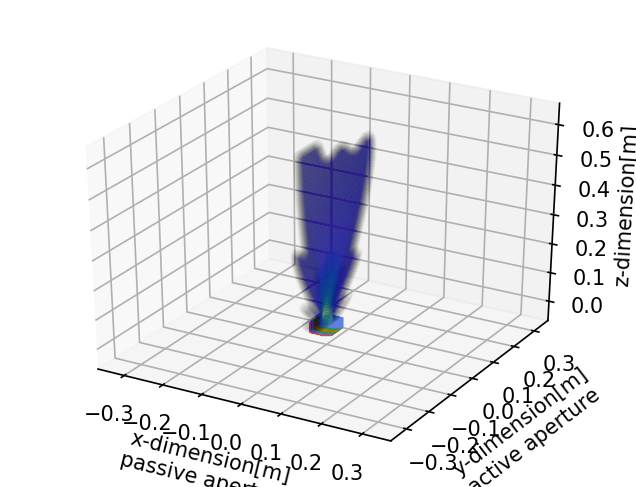

In [123]:
visualize_3D_only_alpha(handybeam_world,samplers=[handybeam_world.samplers[0]],transparent_threshold=0.01,opaque_threshold=10)
#visualize_3D_only_alpha(handybeam_world,samplers=[handybeam_world.samplers[0]],transparent_threshold=0.001,opaque_threshold=10,filename="example_visualize_3D_only_alpha_01.png")


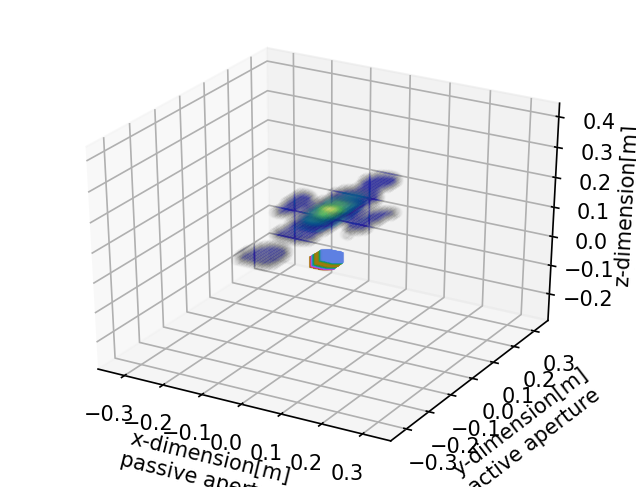

In [124]:
#visualize_3D_only_alpha(handybeam_world,samplers=[handybeam_world.samplers[1]],transparent_threshold=0.001,opaque_threshold=10,filename="example_visualize_3D_only_alpha_02.png")
visualize_3D_only_alpha(handybeam_world,samplers=[handybeam_world.samplers[1]],transparent_threshold=0.01,opaque_threshold=20)

In [125]:
np.nan_to_num(np.abs(handybeam_world.samplers[0].pressure_field))

array([[0.02995176, 0.03016957, 0.03038958, ..., 0.01953953, 0.01937284,
        0.01920537],
       [0.02989139, 0.03010881, 0.03032854, ..., 0.01948776, 0.01931988,
        0.01915148],
       [0.02983118, 0.03004809, 0.03026748, ..., 0.01943503, 0.01926629,
        0.019097  ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [126]:
sampler = handybeam_world.samplers[0]
transparent_threshold=0.1
opaque_threshold = 0.2

pressure_field = np.nan_to_num(np.abs(sampler.pressure_field)).ravel()
pressure_field_peak = np.max(pressure_field)
pressure_field_normalized = pressure_field*(1.0/pressure_field_peak)
# If there are a lot of points in the sampling grid then just display a subset of them.
pressure_field_alpha=np.minimum(1.0,np.maximum(0,(pressure_field_normalized-transparent_threshold)/(opaque_threshold-transparent_threshold)))
pressure_field_colors = amplitude_colormap(pressure_field_normalized)
pressure_field_colors[:,3]=pressure_field_alpha

In [127]:
pressure_field_peak

1.2815

In [128]:
pressure_field_colors

array([[0.17167508, 0.10056873, 0.46977222, 0.        ],
       [0.17321987, 0.10157136, 0.47943423, 0.        ],
       [0.17321987, 0.10157136, 0.47943423, 0.        ],
       ...,
       [0.16295295, 0.09521592, 0.42257292, 0.        ],
       [0.16295295, 0.09521592, 0.42257292, 0.        ],
       [0.16295295, 0.09521592, 0.42257292, 0.        ]])

In [129]:
pressure_field_alpha

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)